## Question : Use Digit dataset and perform the Logistic Regression. Import the dataset from Sklearn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data = datasets.load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
data.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
data.images.shape

(1797, 8, 8)

In [5]:
data.target.shape

(1797,)

In [6]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
data.data.shape

(1797, 64)

## Split the data for training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)

In [9]:
X_train.shape

(1437, 64)

In [10]:
X_test.shape


(360, 64)

In [11]:
y_train.shape

(1437,)

In [12]:
y_test.shape

(360,)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [14]:
scaled_train_x = scaler.fit_transform(X_train)
scaled_test_x = scaler.fit_transform(X_test)

In [15]:
# Building Logistic regression Model

log_reg = LogisticRegression()
log_reg.fit(scaled_train_x, y_train)

LogisticRegression()

In [16]:
ypred = log_reg.predict(scaled_test_x)

In [17]:
print("Accuracy :-",accuracy_score(y_test,ypred))

Accuracy :- 0.9694444444444444


In [19]:
# Confusion matrix for evaluating the performance
cm = confusion_matrix(y_test, ypred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

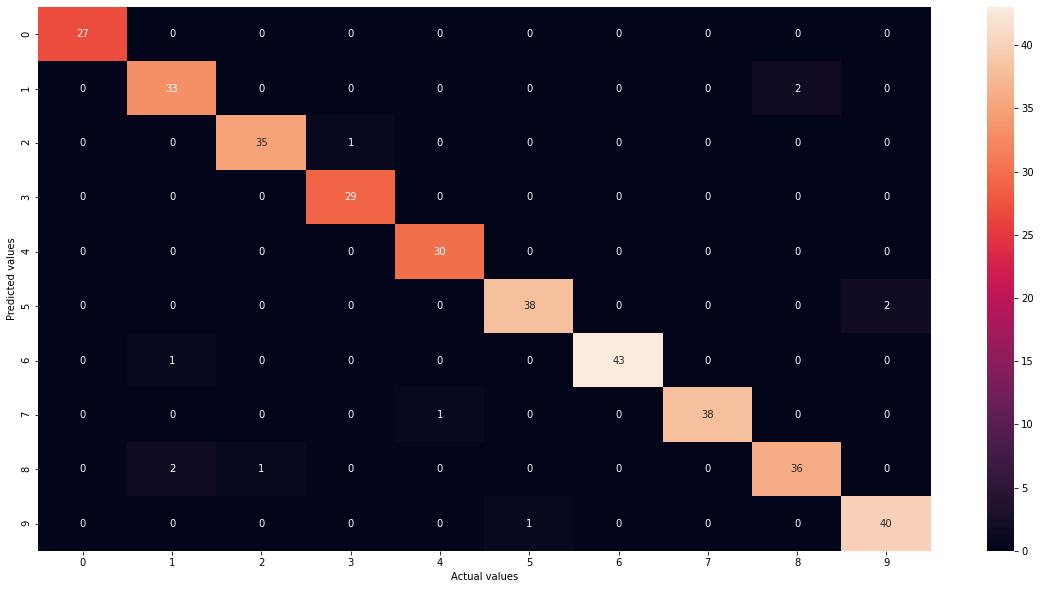

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()